In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import datetime as dt

# 数据读取与初步整理

In [2]:
sale_csv_types = {'StateHoliday': np.dtype(str)}
df_train_set = pd.read_csv('source data/train.csv', parse_dates=[2], dtype=sale_csv_types)
df_test_set = pd.read_csv('source data/test.csv', parse_dates=[3], dtype=sale_csv_types)
df_store_extra_info = pd.read_csv('source data/store.csv')

print("=================================================================")
# 数据总数
print(df_train_set.shape[0])
print(df_test_set.shape[0])

1017209
41088


In [3]:
print(df_train_set['Store'].unique())

[   1    2    3 ... 1113 1114 1115]


In [4]:
print("=================================================================")
df_zero_sale = df_train_set[(df_train_set['Sales'] == 0) & (df_train_set['Open'] != 0)]

if df_zero_sale.shape[0] > 0:
    print('存在正常营业但是销售额为0的情况。')
print("=================================================================")
# 查看df_train_set是否存在缺失值
temp = df_train_set.isnull().any()
print(temp)
# 去掉未营业的数据项，未营业销售额一定为0
df_train_set = df_train_set[df_train_set['Open'] == 1]
print("=================================================================")
# 查看df_test_set是否存在缺失值
temp = df_test_set.isnull().any()
print(temp)
print("=================================================================")
# 查看StateHoliday取值 并替换成整数 0=>0 a=>1 b=>2 c=>3
print(df_train_set['StateHoliday'].unique())
df_train_set.StateHoliday[df_train_set['StateHoliday']=='0']=0
df_train_set.StateHoliday[df_train_set['StateHoliday']=='a']=1
df_train_set.StateHoliday[df_train_set['StateHoliday']=='b']=2
df_train_set.StateHoliday[df_train_set['StateHoliday']=='c']=3
df_train_set['StateHoliday'] = df_train_set['StateHoliday'].astype('int64')
print(df_train_set['StateHoliday'].unique())
print("=================================================================")

存在正常营业但是销售额为0的情况。
Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool
Id               False
Store            False
DayOfWeek        False
Date             False
Open              True
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool
['0' 'a' 'b' 'c']


C:\Users\venom\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\venom\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[0 1 2 3]


C:\Users\venom\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
temp = df_store_extra_info.isnull().any()
print(temp)

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool


In [5]:
print("=================================================================")
df_train_set.info()
print("=================================================================")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 9 columns):
Store            844392 non-null int64
DayOfWeek        844392 non-null int64
Date             844392 non-null datetime64[ns]
Sales            844392 non-null int64
Customers        844392 non-null int64
Open             844392 non-null int64
Promo            844392 non-null int64
StateHoliday     844392 non-null int64
SchoolHoliday    844392 non-null int64
dtypes: datetime64[ns](1), int64(8)
memory usage: 64.4 MB


In [8]:
# 特殊项分析
print("开业但是没有一个顾客:")
df_train_set[(df_train_set['Customers'] == 0)].shape[0]

开业但是没有一个顾客:


52

In [7]:
print("开业且有顾客但是销售额为零:")
df_train_set[(df_train_set['Customers'] > 0) & (df_train_set['Sales'] == 0)]

开业且有顾客但是销售额为零:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
478649,1100,2,2014-04-29,0,3,1,1,0,0
889932,948,4,2013-04-25,0,5,1,1,0,0


In [8]:
print(df_train_set[df_train_set['Sales'] > 20000].shape[0])
print(df_train_set[df_train_set['Sales'] > 25000].shape[0])
print(df_train_set[df_train_set['Sales'] > 30000].shape[0])
print(df_train_set[df_train_set['Sales'] > 35000].shape[0])
print(df_train_set[df_train_set['Sales'] > 40000].shape[0])

4099
758
153
18
1


In [9]:
print(df_train_set[df_train_set['Customers'] > 4000].shape[0])
print(df_train_set[df_train_set['Customers'] > 5000].shape[0])
print(df_train_set[df_train_set['Customers'] > 6000].shape[0])
print(df_train_set[df_train_set['Customers'] > 7000].shape[0])
print(df_train_set[df_train_set['Customers'] > 8000].shape[0])

318
19
1
1
0


In [10]:
# 开业但是没有一个顾客的情况，可能是数据录入错误。有极少顾客但是销售额为零的情况也去掉，可能正处于开业当天
# 所以我们排除了所有开业且销售额为0的项
# 为了减小特殊数据点导致得过拟合，排除掉销售额大于35000或者顾客数大于5000的情况
df_train_set = df_train_set[(df_train_set['Sales'] > 0) & (df_train_set['Sales'] <= 35000) & (df_train_set['Customers'] <= 5000)]

# 观察数据

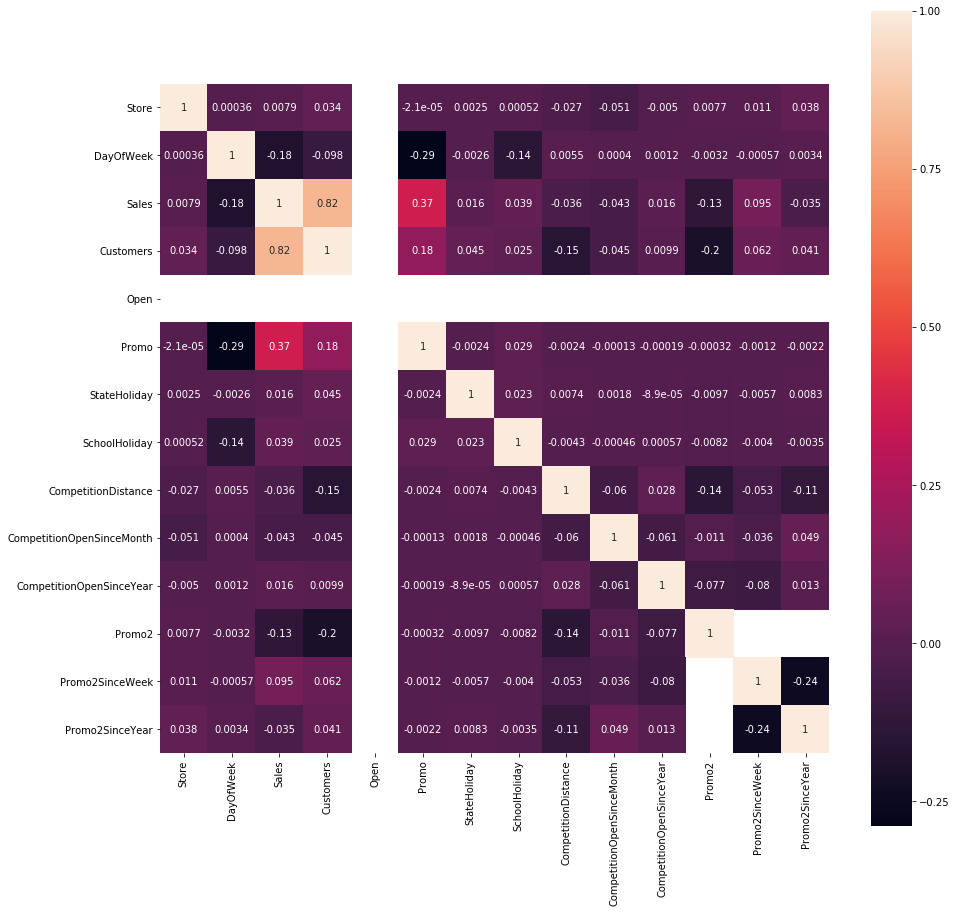

In [13]:
# One-hot encoding of "DayOfWeek" and "StateHoliday"
#dummies_train_df = pd.get_dummies(df_train_set, columns=["DayOfWeek", "StateHoliday"])

temp = pd.merge(df_train_set, df_store_extra_info, on='Store')
corr = temp.corr()
f, (ax1) = plt.subplots(figsize=(15, 15))

sb.heatmap(corr, annot=True, square=True, ax=ax1, color="green")

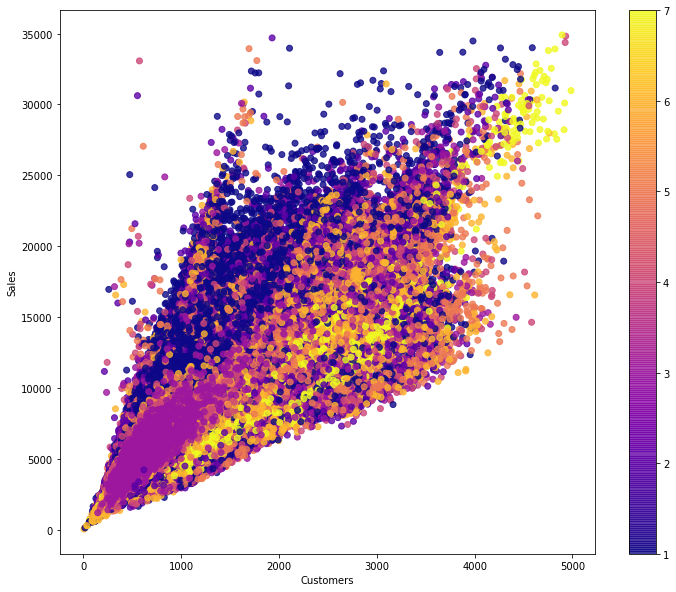

In [13]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
plt.scatter(df_train_set['Customers'], df_train_set['Sales'], c=df_train_set['DayOfWeek'], alpha=0.8, cmap=plt.cm.get_cmap('plasma'))
plt.colorbar()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.savefig('销售额_顾客数_星期几关系图1.png', dpi=300, bbox_inches='tight')
plt.show()

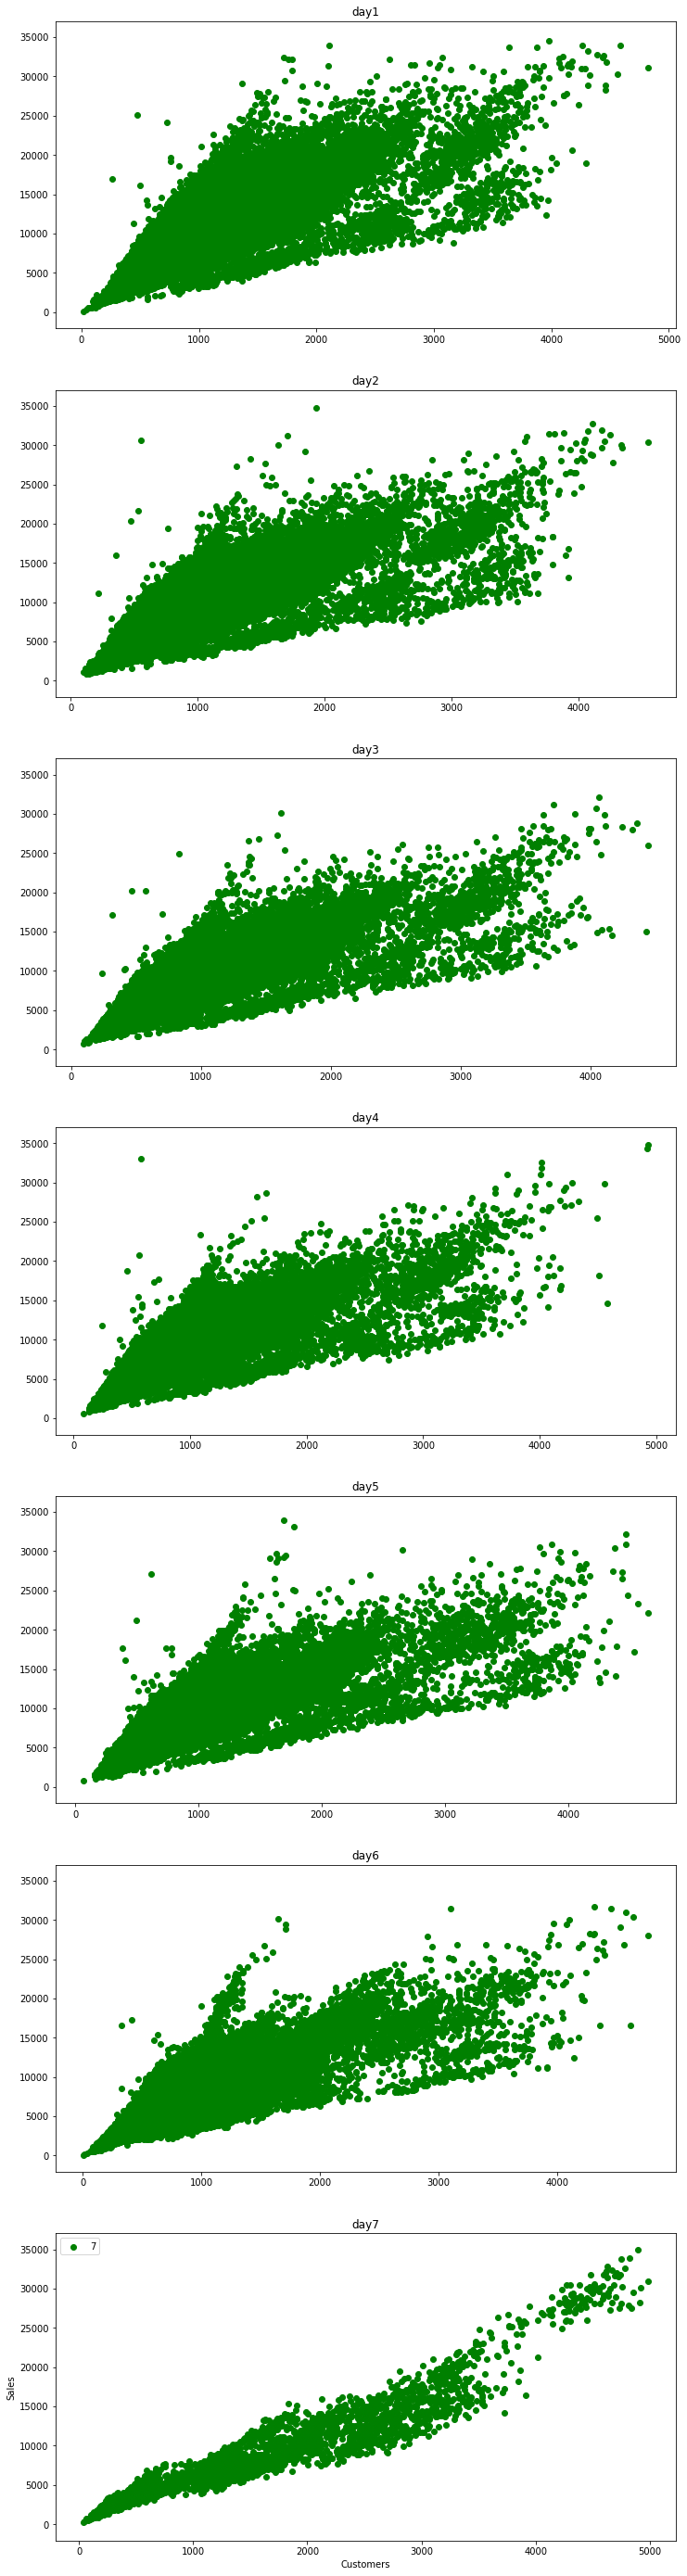

In [14]:
plt.rcParams['figure.figsize'] = (12.0, 50.0)
f, ax = plt.subplots(7, sharex=False, sharey=True)

for i in range(1, 8):
    sub_set = df_train_set[df_train_set['DayOfWeek'] == i]
    ax[i - 1].set_title("day{0}".format(i))
    ax[i - 1].scatter(sub_set['Customers'], sub_set['Sales'], label=i, color='green')

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.savefig('销售额_顾客数_星期几关系图2.png', dpi=300, bbox_inches='tight')
plt.show()

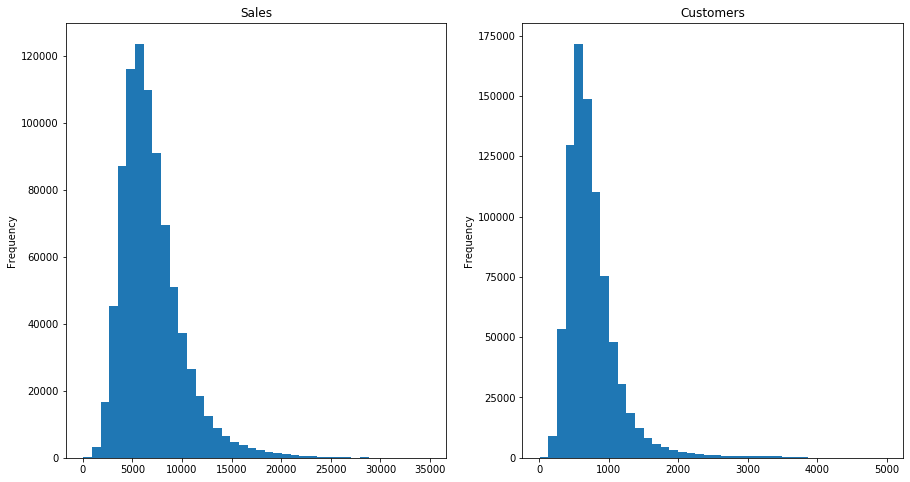

In [15]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
f, (ax1, ax2) = plt.subplots(1, 2)

df_train_set['Sales'].plot(kind='hist', bins=40, ax=ax1,title='Sales')
df_train_set['Customers'].plot(kind='hist', bins=40, ax=ax2, title='Customers')

plt.savefig('销售额_顾客分布图.png', dpi=300, bbox_inches='tight')

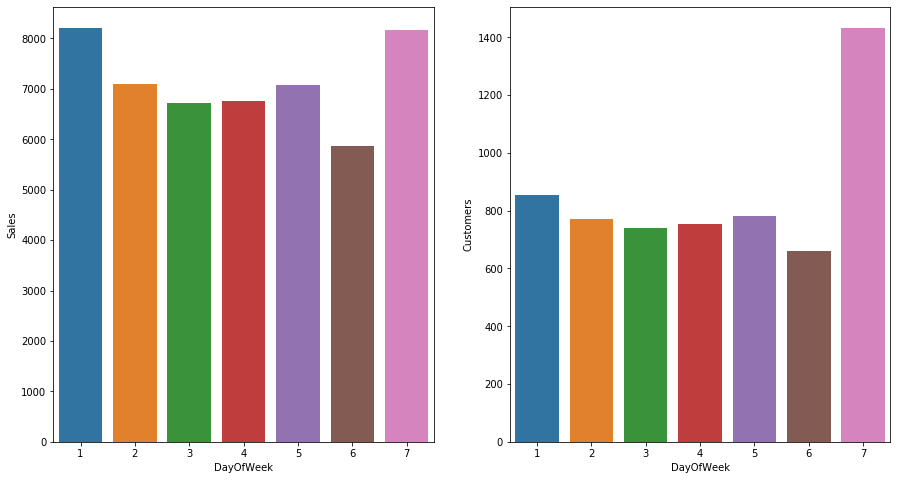

In [16]:
# 一周每天平均销售额和顾客数
plt.rcParams['figure.figsize'] = (15.0, 8.0)
f, (ax1, ax2) = plt.subplots(1, 2)
sb.barplot(x="DayOfWeek", y="Sales", data=df_train_set, order=[1, 2, 3, 4, 5, 6, 7], ax=ax1, ci=None)
sb.barplot(x="DayOfWeek", y="Customers", data=df_train_set, order=[1, 2, 3, 4, 5, 6, 7], ax=ax2, ci=None)

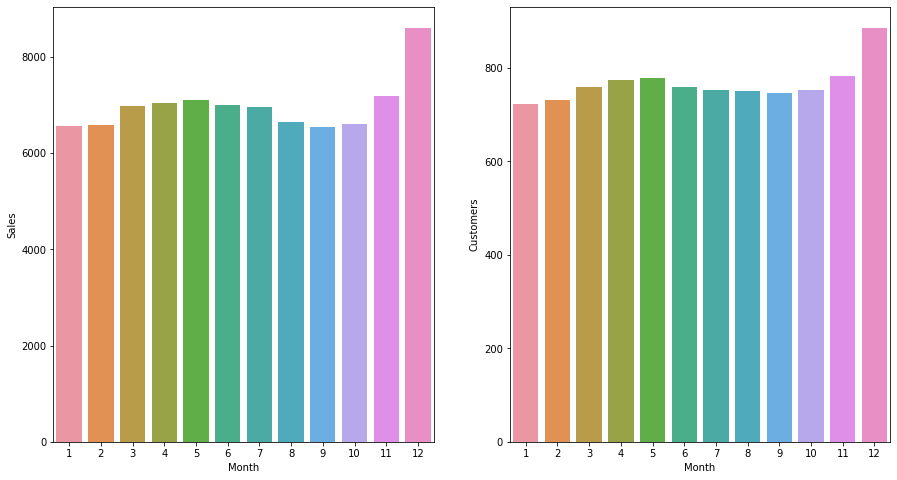

In [17]:
# 一年每月平均销售额和顾客数
df_train_set["Year"] = df_train_set["Date"].apply(lambda x: x.year)
df_train_set["Month"] = df_train_set["Date"].apply(lambda x: x.month)
df_train_set["Day"] = df_train_set["Date"].apply(lambda x: x.day)

plt.rcParams['figure.figsize'] = (15.0, 8.0)
f, (ax1, ax2) = plt.subplots(1, 2)
sb.barplot(x="Month", y="Sales", data=df_train_set, ax=ax1, ci=None)
sb.barplot(x="Month", y="Customers", data=df_train_set, ax=ax2, ci=None)

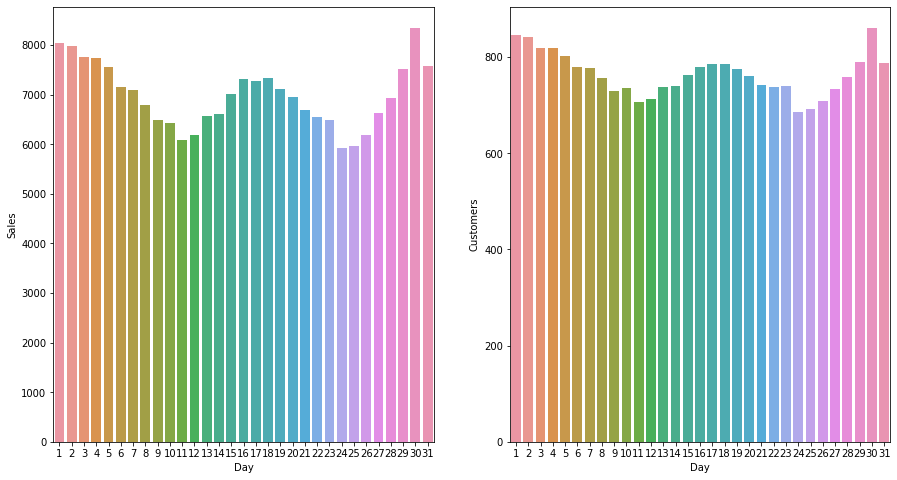

In [18]:
# 一月每天平均销售额和顾客数
plt.rcParams['figure.figsize'] = (15.0, 8.0)
f, (ax1, ax2) = plt.subplots(1, 2)
sb.barplot(x="Day", y="Sales", data=df_train_set, ax=ax1, ci=None)
sb.barplot(x="Day", y="Customers", data=df_train_set, ax=ax2, ci=None)

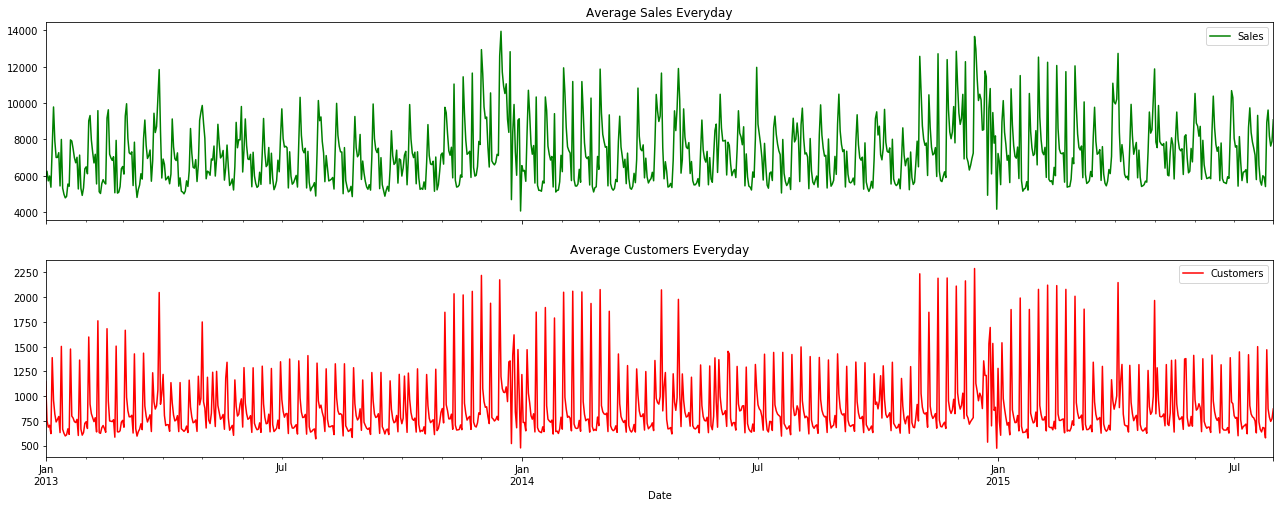

In [32]:
# 查看整体每日销售额曲线
average_sales = df_train_set.groupby('Date')['Sales'].mean()
average_customers = df_train_set.groupby('Date')['Customers'].mean()
plt.rcParams['figure.figsize'] = (22.0, 8.0)
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

average_sales.plot(legend=True, ax=ax1, title='Average Sales Everyday', color='green')
average_customers.plot(legend=True, ax=ax2, title='Average Customers Everyday', color='red')

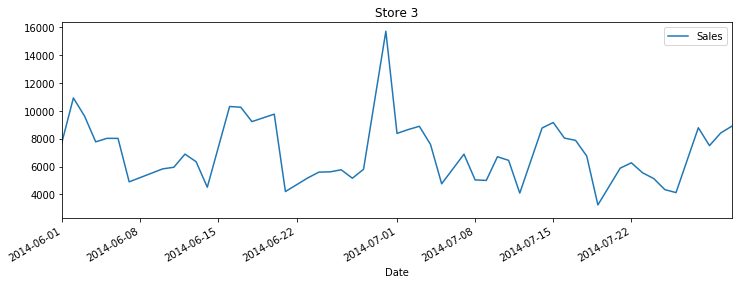

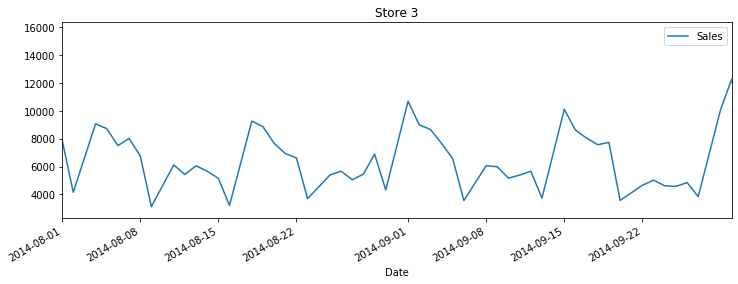

In [37]:
temp = df_train_set[df_train_set.Sales > 0]
temp = temp.loc[temp['Store'] == 3 ,['Date','Sales']]
temp.plot(x='Date',y='Sales',title='Store 3',figsize=(12,4),xlim=['2014-6-1','2014-7-31'])
temp.plot(x='Date',y='Sales',title='Store 3',figsize=(12,4),xlim=['2014-8-1','2014-9-30'])

In [38]:
# 从上图的分析中，我们可以看到店铺的销售额是有周期性变化的，一年之中11，12月份销量要高于其他月份，可能因为年末打折促销的原因.
# 此外从对2014年6月-9月份的销量来看，6，7月份的销售趋势与8，9月份类似，因为我们需要预测的6周在2015年8，9月份，因此我们可以把2015年6，7月份最近的6周数据作为验证数据集，用于模型的优化和验证。

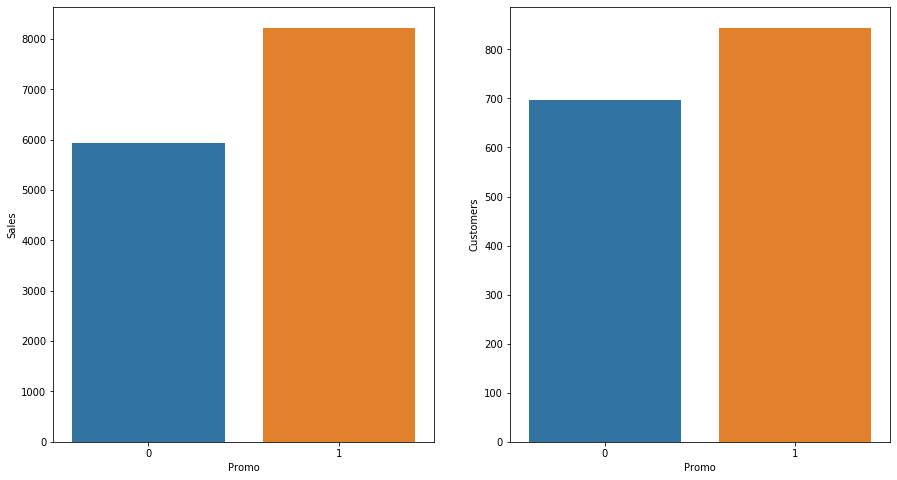

In [20]:
# 查看打折与否的平均销售额和顾客数
plt.rcParams['figure.figsize'] = (15.0, 8.0)
f, (ax1, ax2) = plt.subplots(1, 2)
sb.barplot(x="Promo", y="Sales", data=df_train_set, ax=ax1, ci=None)
sb.barplot(x="Promo", y="Customers", data=df_train_set, ax=ax2, ci=None)

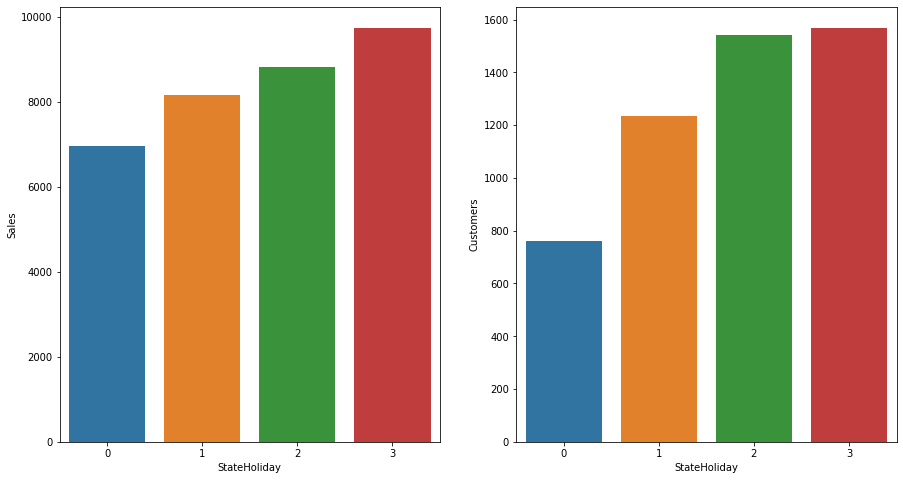

In [21]:
# 查看法定节假日平均销售额顾客数
plt.rcParams['figure.figsize'] = (15.0, 8.0)
f, (ax1, ax2) = plt.subplots(1, 2)
sb.barplot(x="StateHoliday", y="Sales", data=df_train_set, ax=ax1, ci=None)
sb.barplot(x="StateHoliday", y="Customers", data=df_train_set, ax=ax2, ci=None)

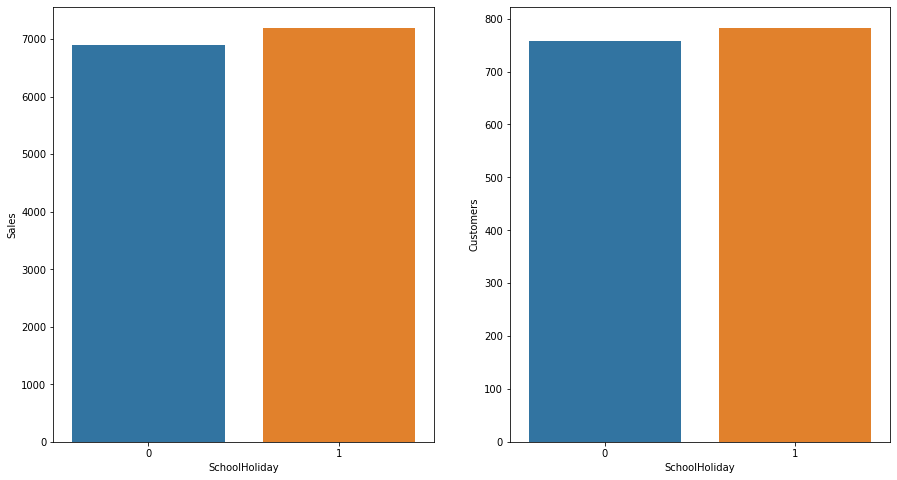

In [22]:
# 查看学校放假日与否和销售额顾客数的关系
plt.rcParams['figure.figsize'] = (15.0, 8.0)
f, (ax1, ax2) = plt.subplots(1, 2)
sb.barplot(x="SchoolHoliday", y="Sales", data=df_train_set, ax=ax1, ci=None)
sb.barplot(x="SchoolHoliday", y="Customers", data=df_train_set, ax=ax2, ci=None)

In [23]:
# 给df_store_extra_info添加平均销售额"AvgSales" 和平均顾客数"AvgCustomers"
store_avg_sales_customers = df_train_set.groupby("Store")[["Sales", "Customers"]].mean()
df_store_avg_sales_customers = pd.DataFrame({"AvgSales": store_avg_sales_customers["Sales"], "AvgCustomers": store_avg_sales_customers["Customers"]}, columns=["AvgSales", "AvgCustomers"])
df_store_merged_info = pd.merge(df_store_avg_sales_customers, df_store_extra_info, on="Store")

# 添加每位顾客平均销售额 "AvgSalesPerCustomer"
store_total_sales = df_train_set.groupby([df_train_set["Store"]])["Sales"].sum()
store_total_customers = df_train_set.groupby([df_train_set["Store"]])["Customers"].sum()
store_sales_per_customer = store_total_sales / store_total_customers
df_store_merged_info = pd.merge(df_store_merged_info, store_sales_per_customer.reset_index(name="AvgSalesPerCustomer"), on="Store")

In [24]:
df_store_merged_info

,Store,AvgSales,AvgCustomers,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,AvgSalesPerCustomer
0,1,4759.096031,564.049936,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,8.437366
1,2,4953.900510,583.998724,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",8.482725
2,3,6942.568678,750.077022,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",9.255808
3,4,9638.401786,1321.752551,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,7.292138
4,5,4676.274711,537.340180,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,8.702634
5,6,5509.946154,635.234615,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN,8.673876
6,7,8817.050891,948.561069,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,9.295185
7,8,5539.358418,658.197704,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,8.415949
8,9,6562.337612,579.816431,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,11.317957
9,10,5568.420918,593.955357,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN,9.375151


In [25]:
# 给所有"CompetitionDistance"缺失值添加0
df_store_merged_info['CompetitionDistance'].fillna(0, inplace=True)

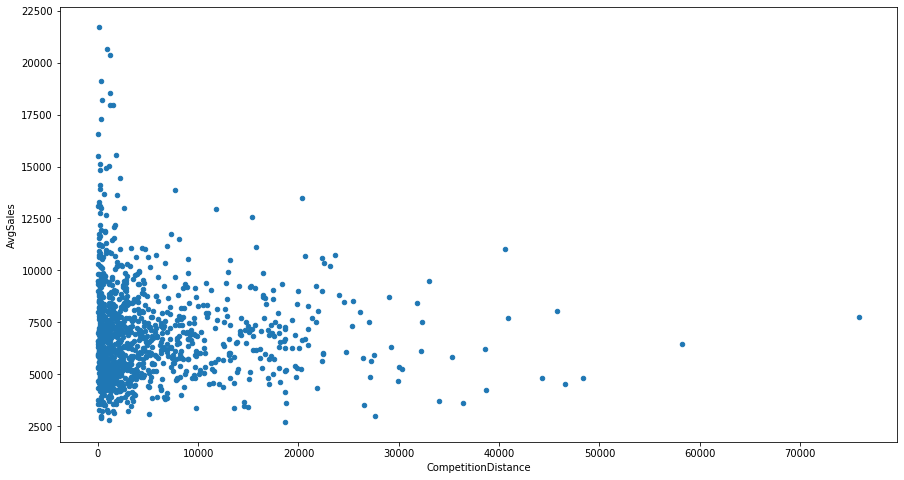

In [26]:
df_store_merged_info.plot(kind='scatter', x='CompetitionDistance', y='AvgSales', figsize=(15,8))

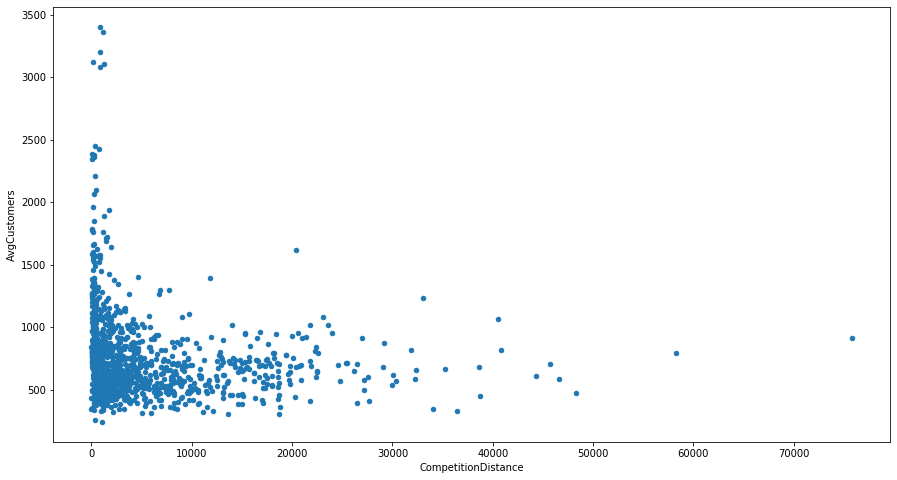

In [27]:
df_store_merged_info.plot(kind='scatter', x='CompetitionDistance', y='AvgCustomers', figsize=(15,8))

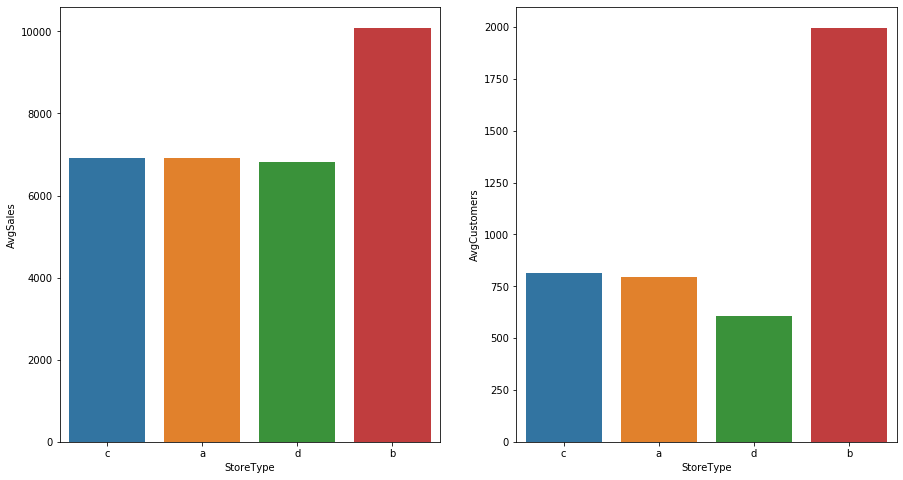

In [28]:
# 每个类型的商店的平均销售额
plt.rcParams['figure.figsize'] = (15.0, 8.0)
f, (ax1, ax2) = plt.subplots(1, 2)
sb.barplot(x="StoreType", y="AvgSales", data=df_store_merged_info, ax=ax1, ci=None)
sb.barplot(x="StoreType", y="AvgCustomers", data=df_store_merged_info, ax=ax2, ci=None)

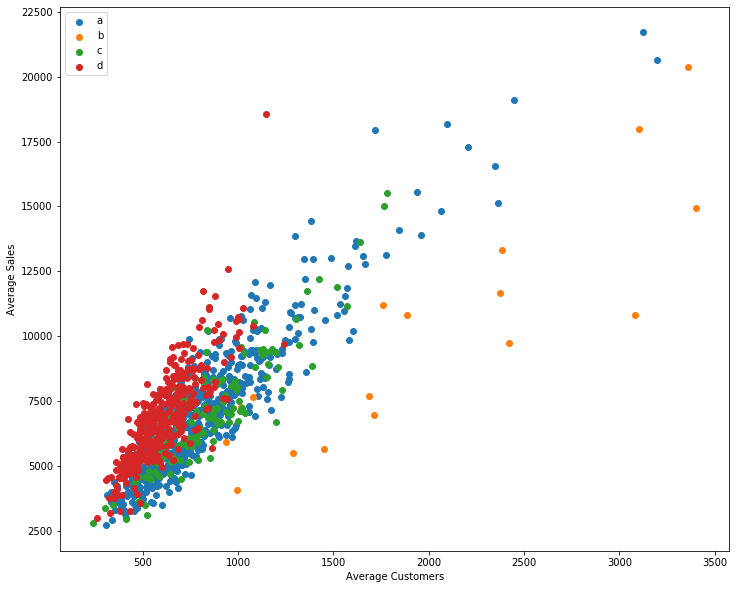

In [29]:
# 每个类型的商店的平均顾客数
plt.rcParams['figure.figsize'] = (12.0, 10.0)
for i in ['a', 'b', 'c', 'd']:
    data = df_store_merged_info[df_store_merged_info['StoreType'] == i]
    if(len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)
plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

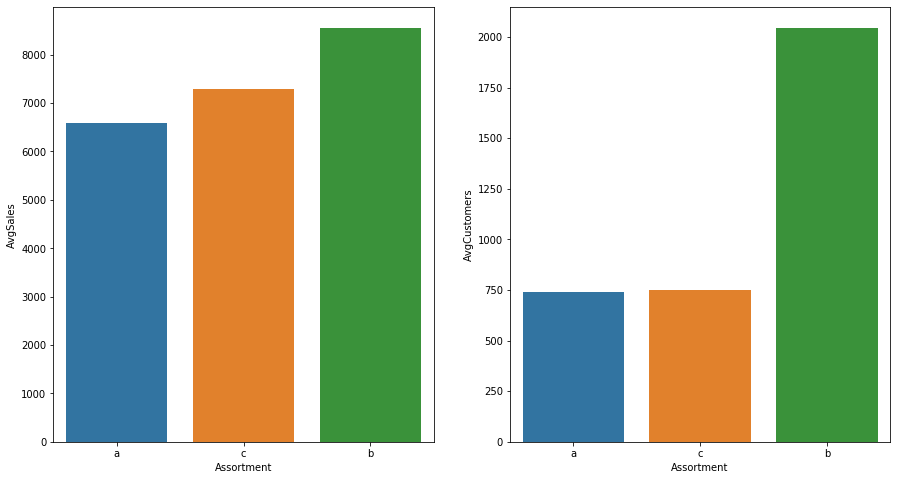

In [30]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
f, (ax1, ax2) = plt.subplots(1, 2)
sb.barplot(x="Assortment", y="AvgSales", data=df_store_merged_info, ax=ax1, ci=None)
sb.barplot(x="Assortment", y="AvgCustomers", data=df_store_merged_info, ax=ax2, ci=None)